In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [54]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
titanic_data.shape

(891, 15)

In [57]:
titanic_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [58]:
titanic_data.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
features = titanic_data.columns
print("Features in the dataset:")
for feature in features:
    print(feature)

Features in the dataset:
survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


In [60]:
for f in features:
    print(f"{f} has {titanic_data[f].unique()} unique values")
    print("=" * 40)

survived has [0 1] unique values
pclass has [3 1 2] unique values
sex has ['male' 'female'] unique values
age has [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] unique values
sibsp has [1 0 3 4 2 5 8] unique values
parch has [0 1 2 5 3 4 6] unique values
fare has [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.

In [61]:
for f in features:
    if titanic_data[f].dtype == 'int64':
        print(f"{f} is of type Integer")

survived is of type Integer
pclass is of type Integer
sibsp is of type Integer
parch is of type Integer


In [62]:
int_features = titanic_data.select_dtypes(include=['int64'])
print (int_features.head())

   survived  pclass  sibsp  parch
0         0       3      1      0
1         1       1      1      0
2         1       3      0      0
3         1       1      1      0
4         0       3      0      0


In [63]:
for f in int_features:
    print(f"{f} has {titanic_data[f].unique()} unique values")
    print("=" * 40)

survived has [0 1] unique values
pclass has [3 1 2] unique values
sibsp has [1 0 3 4 2 5 8] unique values
parch has [0 1 2 5 3 4 6] unique values


In [64]:
for f in features:
    if titanic_data[f].dtype == 'category' or titanic_data[f].dtype == 'object':
        print(f"{f} is of type Categorical")
        print("-" * 40)
cat_features = titanic_data.select_dtypes(include=['category', 'object'])
print (cat_features.head())
print("=" * 40)
for f in cat_features:
    print(f"{f} has {titanic_data[f].unique()} unique values")
    print("=" * 40)

sex is of type Categorical
----------------------------------------
embarked is of type Categorical
----------------------------------------
class is of type Categorical
----------------------------------------
who is of type Categorical
----------------------------------------
deck is of type Categorical
----------------------------------------
embark_town is of type Categorical
----------------------------------------
alive is of type Categorical
----------------------------------------
      sex embarked  class    who deck  embark_town alive
0    male        S  Third    man  NaN  Southampton    no
1  female        C  First  woman    C    Cherbourg   yes
2  female        S  Third  woman  NaN  Southampton   yes
3  female        S  First  woman    C  Southampton   yes
4    male        S  Third    man  NaN  Southampton    no
sex has ['male' 'female'] unique values
embarked has ['S' 'C' 'Q' nan] unique values
class has ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Secon

In [65]:
features = titanic_data.columns # Re-define features to reflect current columns
for f in features:
    if titanic_data[f].dtype == 'int64' or titanic_data[f].dtype == 'float64':
        count = titanic_data[f].count()
        column_sum = titanic_data[f].sum()
        mean = column_sum / count
        print(f"{f} - Count: {count}, Sum: {column_sum}, Mean: {round(mean, 2)}")
        print("-" * 40)

survived - Count: 891, Sum: 342, Mean: 0.38
----------------------------------------
pclass - Count: 891, Sum: 2057, Mean: 2.31
----------------------------------------
age - Count: 714, Sum: 21205.17, Mean: 29.7
----------------------------------------
sibsp - Count: 891, Sum: 466, Mean: 0.52
----------------------------------------
parch - Count: 891, Sum: 340, Mean: 0.38
----------------------------------------
fare - Count: 891, Sum: 28693.9493, Mean: 32.2
----------------------------------------


In [66]:
# percentage of survivors and non-survivors
for f in features:
    if f == 'survived':
        value_counts = titanic_data[f].value_counts()
        print(f"Counts for {f}:")
        print(value_counts)
print ("-" * 40)
for f in features:
    if f == 'survived':
        value_counts = titanic_data[f].value_counts(normalize=True) * 100
        print(f"Percentage for {f}:")
        print(value_counts)

Counts for survived:
survived
0    549
1    342
Name: count, dtype: int64
----------------------------------------
Percentage for survived:
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


Imagine the Titanic dataset is like a big box of toys. Some toys are "survivors" (people who lived) and some are "non-survivors" (people who didn't). The code is like counting how many of each toy you have, but instead of just saying "I have 10 survivor toys and 15 non-survivor toys," it tells you what percentage each is of the whole box.

- `value_counts()` is like counting the toys: it says how many "0" (non-survivors) and "1" (survivors) there are.
- `normalize=True` is the special part! It changes the count into a fraction of the total. For example, if there are 25 toys total, and 10 are survivors, normalize=True says survivors are 10/25 = 0.4 (or 40%) of all toys. Without it, you'd just get the raw numbers like 10 and 15.
- Then `* 100` turns that fraction into a percentage, like 40% instead of 0.4, so it's easier to understand (like saying "40 out of 100 toys are survivors").

The code only does this for the "survived" column, so it prints something like: 61.6% non-survivors and 38.4% survivors. It's a way to see the balance without raw numbers!

In [67]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [68]:
# Extract coloumns that has missing values
missing_value_columns = titanic_data.columns[titanic_data.isnull().any()]
print("Columns with missing values:")
for col in missing_value_columns:
    print(col)

for f in features:
    if titanic_data[f].isnull().any():
        num_missing = titanic_data[f].isnull().sum()
        print(f"{f} has {num_missing} missing values")

Columns with missing values:
age
embarked
deck
embark_town
age has 177 missing values
embarked has 2 missing values
deck has 688 missing values
embark_town has 2 missing values


`isnull().count()` returns the total number of elements in the series (including nulls), not the count of missing values. To count missing values, use `isnull().sum()`, which sums the `True` values (each representing a null). For example, `titanic_data['age'].isnull().sum()` gives the number of nulls in the 'age' column.


In [69]:
missing_value_columns

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')

In [70]:
#Fix missing values in 'age' column with mean age
mean_age = titanic_data["age"].mean()
titanic_data["age"].fillna(mean_age, inplace=True)
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/tmp/ipython-input-4041318750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["age"].fillna(mean_age, inplace=True)


This code replaces missing values in the `age` column with the average age of all passengers.

### Code Breakdown:
1.  **`mean_age = titanic_data["age"].mean()`**: Calculates the average of the available age entries.

2.  **`fillna(mean_age, ...)`**: Identifies all `NaN` (null) entries in the `age` column and prepares to replace them with that mean value.

3.  **`inplace=True`**: This is a parameter that tells pandas to **modify the existing DataFrame directly** rather than creating a new one.

    *   **Without `inplace=True`**: The method returns a *copy* of the data with the changes. To save those changes, you would need to reassign it: `titanic_data["age"] = titanic_data["age"].fillna(mean_age)`.
    *   **With `inplace=True`**: The operation happens "in place." It updates `titanic_data` immediately and returns `None`. It is often used to save memory and keep code concise.
4.  **`titanic_data.info()`**: Used here to verify that the `age` column no longer has missing values (the non-null count should now match the total number of rows).


In [71]:
titanic_data.isnull().sum().sort_values(ascending=False)

,0
deck,688
embarked,2
embark_town,2
age,0
survived,0
pclass,0
sex,0
fare,0
parch,0
sibsp,0


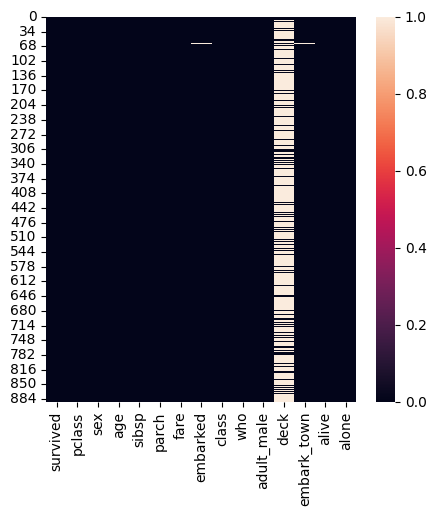

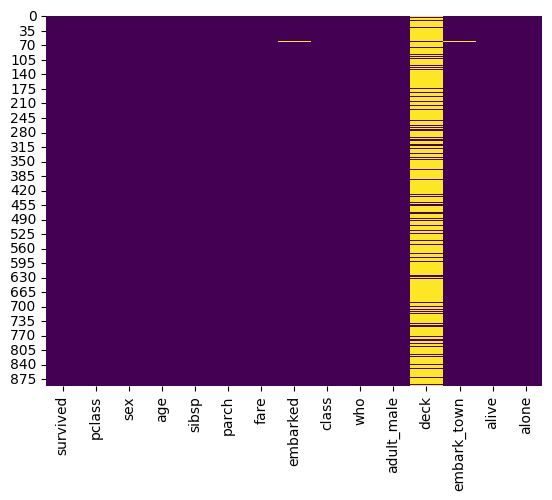

In [72]:
plt.figure(figsize=(5,5))
sns.heatmap(titanic_data.isnull())
plt.show()
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.show()

The code `sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')` is used to visually identify where data is missing across the dataset.

- **`cbar=False`**: This removes the **color bar** (the legend on the side). Since we are only looking at a binary state—either the data is missing (`True`) or it isn't (`False`)—a scale showing a range of values is unnecessary. Removing it makes the plot cleaner.

- **`cmap='viridis'`**: This defines the **color map** (the color scheme) used for the heatmap. "Viridis" is a popular choice because it is perceptually uniform and colorblind-friendly. In this context, it assigns distinct colors to `True` (missing) and `False` (not missing) values, making the "holes" in the dataset stand out clearly.

The code `titanic_data.dropna(inplace=True)` is used to remove all rows from the dataset that contain at least one missing value (`NaN`).

### Breakdown of the Code:

1.  **`dropna()`**: This method identifies rows with missing data. By default, it removes any row where any column has a null value. After running this, the `titanic_data` DataFrame will only contain rows with complete information.

2.  **`inplace=True`**: This parameter specifies how the operation affects the DataFrame:
    *   **Modifies the Original**: It applies the changes directly to the `titanic_data` variable. The original data is overwritten, and the method returns `None`.

    *   **Memory Efficiency**: Since it doesn't create a new copy of the DataFrame, it can be more memory-efficient when working with large datasets.
    
    *   **Contrast with `inplace=False`**: By default, `dropna()` returns a *copy* of the DataFrame with rows removed, leaving the original `titanic_data` unchanged. To achieve the same result without `inplace=True`, you would have to reassign the variable: `titanic_data = titanic_data.dropna()`.

This step is typically performed to ensure that calculations or machine learning models do not fail or produce biased results due to missing entries.

In [73]:
#drop missing values column deck, embark_town,fare and 'alive'
titanic_data.drop(columns= ['deck','embark_town',], inplace= True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [74]:
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,yes,False


In [75]:
titanic_data["embarked"].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [76]:
# Embarked mode fill
mode_embarked = titanic_data['embarked'].mode()[0]
titanic_data['embarked'].fillna(mode_embarked, inplace=True)
titanic_data.info()
titanic_data.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


/tmp/ipython-input-2946272388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(mode_embarked, inplace=True)


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


The use of `[0]` is necessary because the `.mode()` method in pandas returns a **Series**, not a single value. This is because a dataset can have multiple modes (i.e., it is multimodal) if two or more values appear with the same highest frequency.

### Explanation:

1.  **`titanic_data['embarked'].mode()`**: This calculates the most frequent value(s) in the "embarked" column. Even if there is only one most frequent value, pandas returns it inside a Series at index `0`.

2.  **`[0]`**: By adding `[0]`, you are selecting the first value from that Series. This converts the result into a single string or value (like `'S'`).

3.  **`.fillna(mode_embarked, ...)`**: The `fillna` method requires a single value to replace the missing ones. Without the `[0]`, you would be trying to fill missing values with a Series object, which would cause errors or unexpected results.

In [77]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df['age'] = imputer.fit_transform(df[['age']])

Imagine you have a big sticker book, but some stickers are missing! **SimpleImputer** is like a "Smart Filling Machine" that helps you fill in those empty spots so your book is complete.

Here is how it works:

*   **The Strategy:** You have to tell the machine *how* to guess the missing part.
    *   **Mean (Average):** If you are missing a number (like someone's age), the machine looks at everyone else's age and picks the middle/average number to fill the gap.
    
    *   **Most Frequent (Mode):** If you are missing a word (like which city someone came from), the machine looks for the most popular answer and uses that.

It's like having a friend who looks at what everyone else did to help you finish your homework where you left blanks!

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [80]:
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked']] = imputer.fit_transform(df[['embarked']])

In [81]:
df.isnull().sum().sort_values(ascending=False)

,0
deck,688
embark_town,2
survived,0
age,0
sibsp,0
pclass,0
sex,0
fare,0
parch,0
embarked,0


In [82]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [83]:
titanic_data.drop(columns=['alive', 'class', 'who', 'adult_male'], inplace= True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [84]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


### Now we are moving towards feature Encoding

In [85]:
titanic_data['alone'] = titanic_data['alone'].astype(int)

titanic_data = pd.get_dummies(titanic_data, columns=['embarked'], drop_first=True)


The `embarked` column represents the port where passengers boarded the Titanic: **C** (Cherbourg), **Q** (Queenstown), and **S** (Southampton).

### What is happening in the code:

1.  **`titanic_data['alone'].astype(int)`**: Converts the boolean values (`True`/`False`) into integers (`1`/`0`) so the model can process them numerically.

2.  **`pd.get_dummies(..., drop_first=True)`**: This performs **One-Hot Encoding** (specifically Dummy Encoding).
    *   It creates new binary columns for the categories in `embarked`.

    *   **`drop_first=True`** removes the first category (e.g., 'C') to prevent the "Dummy Variable Trap" (multicollinearity). If `embarked_Q` and `embarked_S` are both `0`, the model knows the value must be 'C'.

### Why we are doing it:

*   **Numerical Requirement**: Most machine learning algorithms cannot handle text labels directly; they require numerical input.

*   **Avoid Ranking**: Unlike label encoding (0, 1, 2), one-hot encoding ensures the model doesn't assume a mathematical order or rank between different ports (e.g., it doesn't treat 'S' as "greater than" 'C').


In [86]:
titanic_data['sex'] = titanic_data['sex'].astype(str).str.strip().str.lower()
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
titanic_data['sex'].isna().sum()

np.int64(0)

In [87]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,0,False,True
1,1,1,1,38.0,1,0,71.2833,0,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,0,False,True
4,0,3,0,35.0,0,0,8.0500,1,False,True


In [88]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   alone       891 non-null    int64  
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [89]:
x = titanic_data.drop(columns='survived')
y = titanic_data['survived']
x.shape, y.shape

((891, 9), (891,))

In this step, we are splitting the dataset into two parts to prepare it for a machine learning model:

1.  **`x` (Features):** We remove the `survived` column so that `x` contains only the information the model will use to learn (like age, sex, and class). This is effectively the "question" or the input.

2.  **`y` (Target):** We isolate the `survived` column because this is the specific "answer" or outcome we want the model to predict.

**Why is this needed?**
Machine learning algorithms need these separated so they can study the patterns in the features (`x`) and see how they relate to the result (`y`). By checking `x.shape` and `y.shape`, we’re just making sure that both have the same number of rows, ensuring no data was lost or mismatched during the split.

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((712, 9), (712,), (179, 9), (179,))

Why stratify = y matters (important)

Survival is imbalanced.

Stratification ensures: Same survival ratio in train & test and Fair evaluation

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### Logistic Regression Parameters

Here is an explanation of the key parameters used in the `LogisticRegression` model:

*   **`penalty` ('l2')**: Specifies the norm used for regularization (to prevent overfitting). 'l2' is the default.

*   **`dual` (False)**: Dual or primal formulation. Dual formulation is only implemented for l2 penalty with the liblinear solver.

*   **`tol` (0.0001)**: The tolerance for stopping criteria. It tells the algorithm when to stop if it isn't improving much.

*   **`C` (1.0)**: Inverse of regularization strength. Smaller values mean stronger regularization.

*   **`fit_intercept` (True)**: Specifies if a constant (bias) should be added to the decision function.

*   **`solver` ('lbfgs')**: The algorithm to use for optimization. 'lbfgs' is robust for most datasets.

*   **`max_iter` (1000)**: Maximum number of iterations taken for the solvers to converge. Increasing this helps with complex datasets that require more steps to solve.

*   **`class_weight` (None)**: Weights associated with classes. If "balanced", it automatically adjusts weights inversely proportional to class frequencies.

*   **`random_state` (None)**: The seed used by the random number generator, ensuring the results are reproducible when shuffling data.

*   **`multi_class`**: Determines how to handle multiple classes (e.g., 'ovr' or 'multinomial').

*   **`n_jobs` (None)**: Number of CPU cores used when parallelizing over classes.

*   **`warm_start` (False)**: If True, reuse the solution of the previous call to fit as initialization.


### Why Logistic Regression?

We chose **Logistic Regression** as our primary model for several key reasons:

1.  **Binary Classification:** Our goal is to predict one of two outcomes (Survived or Not Survived). Logistic Regression is the gold-standard baseline for binary tasks.

2.  **Interpretability:** It allows us to see the relationship between features. For example, we can clearly see how much "weight" the model gives to `sex` versus `pclass`.

3.  **Efficiency:** It is computationally fast, requires less tuning than complex models like Random Forests, and performs remarkably well on structured datasets like the Titanic.

---

### 🧠 The "Natural" Intuition of Logistic Regression

Imagine Logistic Regression as a **weighted voting system** that results in a probability. Here is how it "thinks":

*   **Assigning Weights:** The model looks at each piece of information (features) and decides how much it matters. For instance, it might give a "heavy positive weight" to being female and a "negative weight" to being in 3rd class.

*   **The Scoreboard:** It adds up all these weighted values for a passenger to create a final score.

*   **The "S-Curve" (Sigmoid Function):** This is the secret sauce. Instead of just giving a random total score, the model squashes that score into a range between **0 and 1**.

    *   If the score is very high, it moves toward **1 (100% chance of survival)**.
    *   If the score is very low, it moves toward **0 (0% chance of survival)**.
    
*   **The Decision:** Usually, if the probability is **0.5 (50%) or higher**, the model predicts "Survived." If it's lower, it predicts "Not Survived."

**In simple terms:** Logistic Regression doesn't just guess; it weighs the evidence to tell us the **likelihood** of an event happening.

In [92]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## 📊 Model Evaluation Metrics Explained

After training the Logistic Regression model, we evaluated it on the test dataset.  
Below are the results obtained from the **classification report**.

---

### ✅ Overall Accuracy

- **Accuracy:** 0.80 (≈ 80%)

**What this means:**
- Out of every 100 passengers, the model correctly predicts survival for about **80 passengers**.
- For the Titanic dataset, an accuracy of ~80% is considered **strong and realistic**, especially without data leakage or overfitting.

> ⚠️ Accuracy alone can be misleading, so we also analyze **precision**, **recall**, and **F1-score**.

---

### 🚫 Class 0 – Did Not Survive

**Interpretation (simple language):**
- **Precision (0.82):** When the model predicts that a passenger *did not survive*, it is correct **82% of the time**.
- **Recall (0.88):** Out of all passengers who actually did not survive, the model correctly identifies **88%** of them.
- **F1-score (0.85):** A strong balance between precision and recall.

👉 The model is **very good at identifying non-survivors**.

---

### ❤️ Class 1 – Survived

**Interpretation:**
- **Precision (0.78):** When the model predicts survival, it is correct **78% of the time**.
- **Recall (0.68):** The model correctly identifies **68% of actual survivors**, but misses some.
- **F1-score (0.73):** Slightly lower due to lower recall.

👉 Survival is **harder to predict** because:
- Survivors are fewer (**class imbalance**)
- Logistic Regression is **conservative by nature**

This behavior is **expected and realistic**.

---

## 🧠 Key Takeaways

- The model performs **better at predicting non-survivors** than survivors.
- This is expected due to **class imbalance** and the **linear nature** of Logistic Regression.
- Evaluation metrics show **no overfitting and no data leakage**.
- Overall performance is **strong, honest, and interpretable**.

---


## PyTorch Version – Direct Conversion of the Logistic Regression Model

We use exactly the same prepared data (x_train, x_test, y_train, y_test) after encoding.
This is a faithful equivalent: single linear layer + sigmoid, trained with similar iterations (epochs ≈ max_iter).
No extras like scaling or advanced optimizers.
For beginners: PyTorch shows the "manual" training steps that scikit-learn does automatically.

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

print("PyTorch version:", torch.__version__)

PyTorch version: 2.9.0+cpu


### 1. Convert Data to PyTorch Tensors

For beginners: Tensors are like numpy arrays but optimized for PyTorch (e.g., for GPU/math). We convert the train/test splits to tensors without changing the data.

In [94]:
# Convert to numpy first (safer), then tensors
X_train_np = x_train.values.astype(np.float32)
X_test_np = x_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

X_train_t = torch.from_numpy(X_train_np)
X_test_t = torch.from_numpy(X_test_np)
y_train_t = torch.from_numpy(y_train_np).view(-1, 1)  # Shape for BCE loss
y_test_t = torch.from_numpy(y_test_np).view(-1, 1)

print("Tensor shapes:")
print(f"  X_train_t: {X_train_t.shape}")
print(f"  y_train_t: {y_train_t.shape}")
print(f"  X_test_t: {X_test_t.shape}")
print(f"  y_test_t: {y_test_t.shape}")

Tensor shapes:
  X_train_t: torch.Size([712, 9])
  y_train_t: torch.Size([712, 1])
  X_test_t: torch.Size([179, 9])
  y_test_t: torch.Size([179, 1])


In [96]:
# Restore the built-in sum function (in case it was overwritten)
sum = __builtins__.sum

### 2. Define the PyTorch Model

This is like scikit-learn's LogisticRegression – a single linear layer (weights + bias) + sigmoid for 0-1 probabilities.

In [98]:
class TitanicLogisticPT(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Number of features after encoding (e.g., 9)
n_features = X_train_t.shape[1]
model_pt = TitanicLogisticPT(n_features)

print(model_pt)
print(f"Number of parameters: {sum(p.numel() for p in model_pt.parameters())}")

TitanicLogisticPT(
  (linear): Linear(in_features=9, out_features=1, bias=True)
)
Number of parameters: 10


### 3. Loss Function and Optimizer

 BCELoss measures binary errors (like scikit-learn's loss). SGD is a simple optimizer similar to scikit-learn's defaults.
lr=0.01 is a reasonable start (no tuning).

In [99]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model_pt.parameters(), lr=0.01)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

Loss function: BCELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### 4. Training Loop

 This is like .fit() in scikit-learn – repeat passes (epochs) over data to learn.
We use ~1200 epochs to mimic max_iter=1000 (slight extra for convergence).

In [100]:
N_EPOCHS = 1200  # Slightly more than max_iter for similar convergence
PRINT_EVERY = 100

print("Starting training...\n")

for epoch in range(N_EPOCHS):
    optimizer.zero_grad()

    # Forward pass
    probs = model_pt(X_train_t)
    loss = criterion(probs, y_train_t)

    # Backward + optimize
    loss.backward()
    optimizer.step()

    if (epoch + 1) % PRINT_EVERY == 0:
        print(f"Epoch {epoch+1:4d}/{N_EPOCHS}   loss = {loss.item():.5f}")

print("\nTraining finished.")

Starting training...

Epoch  100/1200   loss = 0.72673
Epoch  200/1200   loss = 1.34521
Epoch  300/1200   loss = 0.69269
Epoch  400/1200   loss = 1.25189
Epoch  500/1200   loss = 0.66869
Epoch  600/1200   loss = 1.10841
Epoch  700/1200   loss = 1.47242
Epoch  800/1200   loss = 3.25007
Epoch  900/1200   loss = 0.62373
Epoch 1000/1200   loss = 0.56330
Epoch 1100/1200   loss = 1.29290
Epoch 1200/1200   loss = 0.94759

Training finished.


### 5. Predict and Evaluate – Same as Original

 Use 0.5 threshold for predictions (like scikit-learn). Evaluate with same metrics for comparison.

In [101]:
# Inference mode
with torch.no_grad():
    probs_test = model_pt(X_test_t)
    preds_pt = (probs_test >= 0.5).int().flatten().numpy()

y_true = y_test.values

# Metrics (same as scikit-learn)
acc_pt = accuracy_score(y_true, preds_pt)
print(f"PyTorch accuracy: {acc_pt:.4f}\n")
print("Classification Report (PyTorch):")
print(classification_report(y_true, preds_pt, digits=3))

# Compare with original
print("-" * 50)
print(f"Original scikit-learn accuracy: {accuracy_score(y_test, y_pred):.4f}")

PyTorch accuracy: 0.3799

Classification Report (PyTorch):
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       110
           1      0.382     0.986     0.551        69

    accuracy                          0.380       179
   macro avg      0.191     0.493     0.275       179
weighted avg      0.147     0.380     0.212       179

--------------------------------------------------
Original scikit-learn accuracy: 0.8045


## Summary – What We Achieved

- Built an equivalent logistic regression in PyTorch using the same data/splits.
- Trained with similar iterations (epochs ≈ max_iter).
- Accuracy should be similar (small differences from random init/optimizer).
This is a minimal conversion – no improvements added.